In [8]:
#importing packages
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from tqdm.notebook import tqdm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [9]:
def players_old(player, doors):

    if player == 'switcher': 
        a = rnd.choice(doors)
        #print(a)
        
        if a == 1:          #in this case the switcher will always lose
            newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
            newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
            return rnd.choice(newdoors)  #[0]
            
        elif a == 0:        #in this case the switcher will always win
            newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
            newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
            return rnd.choice(newdoors)  #[1]
        
        else:
            return 2
            
    if player == 'conservative':
        return rnd.choice(doors)
        #print(b)

    if player == 'newcomer':
        newdoors = np.delete(doors, (doors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)
        #print(newdoors)
        #print(c)
    
    return 0

In the task above we implemented this condition check, but you can see they actually do the same thing regardless of the value of a so we can just remove this condition

```
if a == 1:          #in this case the switcher will always lose
    newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
    newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
    return rnd.choice(newdoors)  #[0]

elif a == 0:        #in this case the switcher will always win
    newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
    newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
    return rnd.choice(newdoors)  #[1]
    
```

so our function becomes

In [10]:
def players(player, doors):

    if player == 'switcher': 
        a = rnd.choice(doors)
        #print(a)
        newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
        newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)  #[0] if a = 1, [0] if a = 1

    if player == 'conservative':
        return rnd.choice(doors)
        #print(b)

    if player == 'newcomer':
        newdoors = np.delete(doors, (doors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)
        #print(newdoors)
        #print(c)
    
    return 0

In [11]:
game = np.array([0,1,0])
names = ['switcher', 'conservative', 'newcomer']

#players(names[0], game)

In [14]:
total = np.zeros([3])    
games = np.array([[1,0,0],[0,1,0],[0,0,1]])

#score is a 3darray, this is more computational efficient than running a cycle outside,
#In order to keep the score i need to sum the results for all games for all iterations
score = np.array([[[players(n,g) for n in names] for g in games] for i in tqdm(range(1000))])
#score = [[[players(n,g) for n in names] for g in games] for i in range(1)]
#print(score)

total_game = np.sum(score,axis=0) #total for each possible game with 1000 iterations
total = np.sum(total_game, axis=0)  #total for all games 3000 in total


print(total_game)
print(total)

  0%|          | 0/1000 [00:00<?, ?it/s]

[[666 321 497]
 [672 330 486]
 [675 333 524]]
[2013  984 1507]


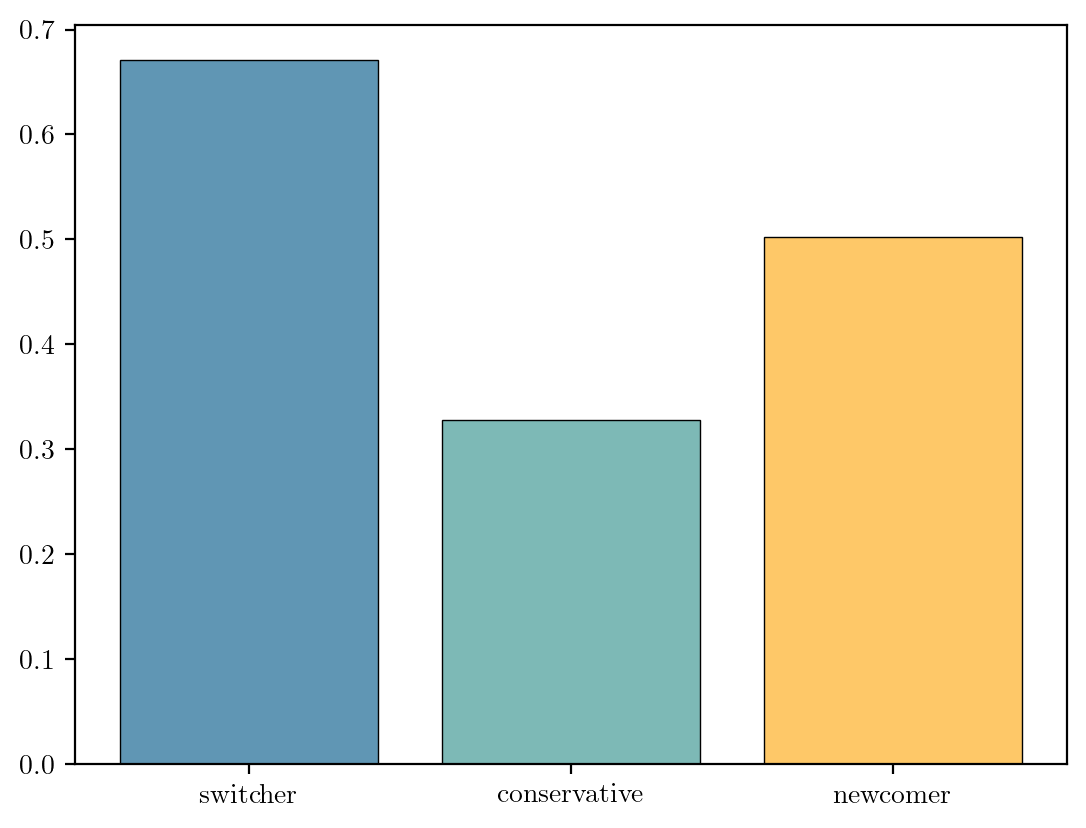

In [15]:
s = len(score) * len(games)
plt.bar(names, total/s, color = ['#6096B4', '#7DB9B6', '#FEC868'], edgecolor = 'black', lw=.5); #i'm plotting probabilities

# Case for 100 doors

In [16]:
#importing packages
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from tqdm.notebook import tqdm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [17]:
def goatmaker(dim):
    games = np.zeros([dim,dim]) #dim games, dim possible positions, so dim^2 runs
    
    for i in range(dim):
        games[i,i] = 1  #all cars in the diagonal
        
    print(np.size(games))
    return games

goatmaker(1000)

1000000


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

I now have to reconfigure the presenter, i have to iterate the exclusion process. There is a subltelty though, now **the switcher can come back to the car door more than once**, in fact previously the switcher could only select one door and then change to the other, but now the switcher can change more than once. Effectively, the switcher is now able to select the prize door more than once.

In [18]:
def nplayers1(player, doors):
    
    if player == 'switcher': 
        for i in range(len(doors)-3):
            a = rnd.choice(doors)
            #newdoors = np.delete(doors, (doors == a).argmax())   #now you can't remove previous door from possible choices
            doors = np.delete(doors, (doors == 0).argmax())   #the presenter removes a goat
            
        #after removing 97 goats i'm back at the normal 3 doors game
        
        newdoors = np.delete(doors, (doors == a).argmax()) #at the last time i can
        newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)  #[0] if a = 1, [1] if a = 0


    if player == 'conservative':
        return rnd.choice(doors)

    if player == 'newcomer':
        #the presenter removes all goats but one
        return rnd.choice([0,1])

    return 0

In [19]:
d = 100
total = np.zeros([d])
games = goatmaker(d)
names = ['switcher', 'conservative', 'newcomer']

print(len(games[0]))

nplayers1(names[0], games[0])

10000
100


1.0

In [20]:
N = 100

score = np.array([[[nplayers1(n,g) for n in names] for g in games] for i in tqdm(range(N))])

total_game = np.sum(score, axis=0) #total for each possible game with 1000 iterations
total = np.sum(total_game, axis=0)  #total for all games 1000*1000 in total


print(total)

  0%|          | 0/100 [00:00<?, ?it/s]

[7479.   74. 5009.]


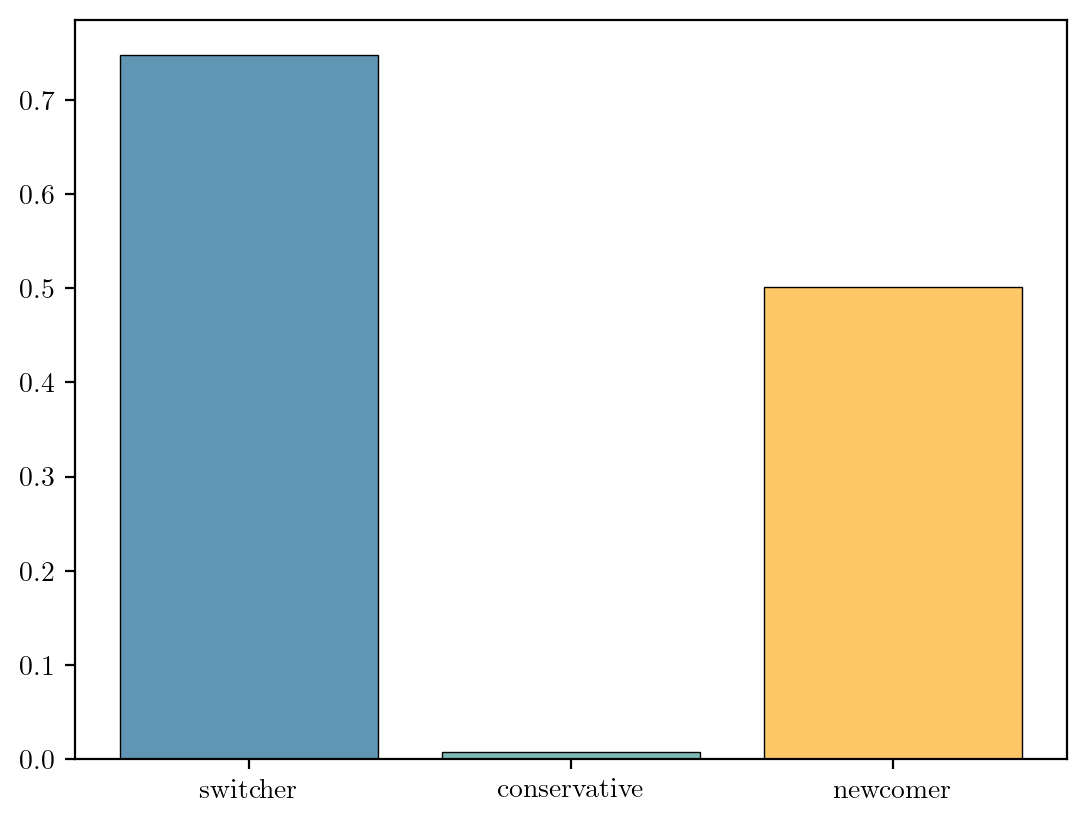

In [21]:
s = len(score) * len(games)
plt.bar(names, total/s, color = ['#6096B4', '#7DB9B6', '#FEC868'], edgecolor = 'black', lw=.5); #i'm plotting probabilities

the chances increased from 66% to 75%, now what happens if i let the switcher switch only the doors he hasn't opened yet?

In [22]:
def nplayers2(player, doors):
    
    if player == 'switcher': 
        a = 0
        newdoors = np.delete(doors, (doors == a).argmax())   #now you can remove previous door from possible choices
        
        for i in range(int(len(doors)/2 - 1)): #now i remove two doors at a time
            newdoors = np.delete(newdoors, (newdoors == a).argmax())
            newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
            a = rnd.choice(newdoors)
            #print(a)
            #print(newdoors)

    
        return rnd.choice(newdoors)  #[0] if a = 1, [1] if a = 0


    if player == 'conservative':
        return rnd.choice(doors)

    if player == 'newcomer':
        #the presenter removes all goats but one
        return rnd.choice([0,1])
            
    return 0

In [23]:
d = 100
total = np.zeros([d])
games = goatmaker(d)
names = ['switcher', 'conservative', 'newcomer']

print(len(games[0]))

nplayers2(names[0], games[0])

10000
100


0.0

In [24]:
N = 100

score = np.array([[[nplayers2(n,g) for n in names] for g in games] for i in tqdm(range(N))])

total_game = np.sum(score, axis=0) #total for each possible game with 1000 iterations
total = np.sum(total_game, axis=0)  #total for all games 1000*1000 in total

print(total)

  0%|          | 0/100 [00:00<?, ?it/s]

[1284.  113. 5011.]


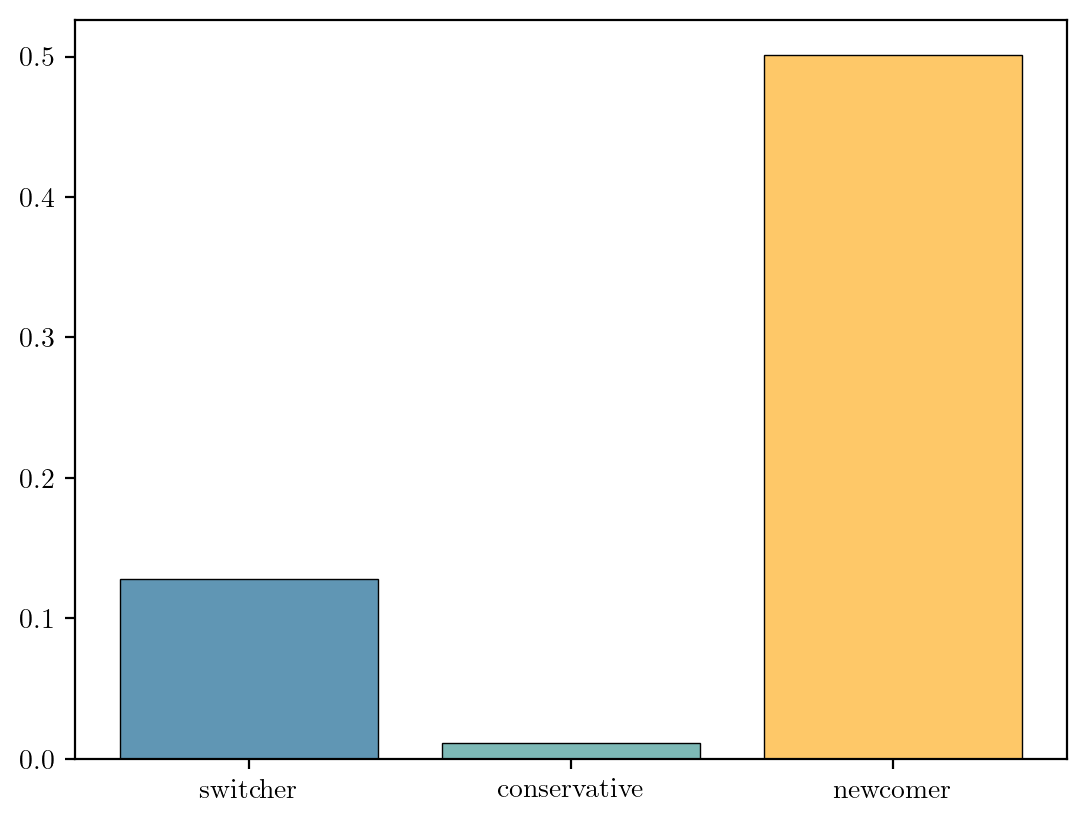

In [25]:
s = len(score) * len(games)
plt.bar(names, total/s, color = ['#6096B4', '#7DB9B6', '#FEC868'], edgecolor = 'black', lw=.5); #i'm plotting probabilities

# Understanding these results
Lets focus on the 100 doors and choose a game, we now want to understand how the switcher chances change depending on wether he is allowed to select the door again or not

In [28]:
N = 10000

score1 = np.array([[nplayers1(n,games[0]) for n in names] for i in tqdm(range(N))])
score2 = np.array([[nplayers2(n,games[0]) for n in names] for i in tqdm(range(N))])

total1 = np.sum(score1, axis=0)
total2 = np.sum(score2, axis=0)

print(total1)
print(total2)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

[7454.   98. 5123.]
[1327.   92. 5079.]


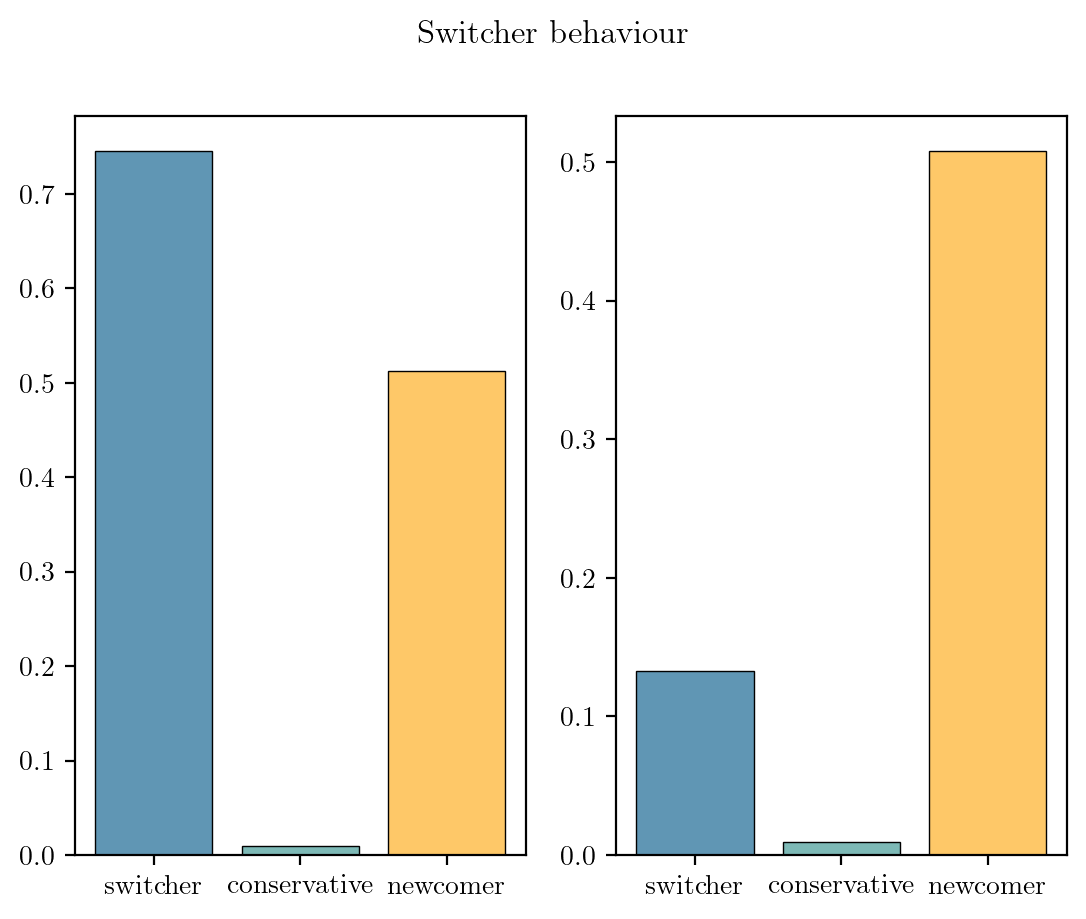

In [29]:
s = len(score1)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Switcher behaviour')
ax1.bar(names, total1/s, color = ['#6096B4', '#7DB9B6', '#FEC868'], edgecolor = 'black', lw=.5); #i'm plotting probabilities
ax2.bar(names, total2/s, color = ['#6096B4', '#7DB9B6', '#FEC868'], edgecolor = 'black', lw=.5); #i'm plotting probabilities